# Exploratory Data Analysis - EDA Project


## Understanding and Visualising Insights Through Weather Data Analysis



### Problem Statement 

The objective is to explore the Weather Conditions dataset and extract meaningful insights such as weather trends, frequency of different conditions, relationships among numerical and categorical variables, and the presence of outliers or missing values.

In [73]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [74]:
df = pd.read_csv("seattle-weather.csv")

### Pandas shape attribute

It gives the dimensions (rows, columns) of the Dataframe

In [75]:
df.shape

(1461, 6)

### Pandas info method

It shows the no. of rows in each column, non-null count and Data-type

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


### Pandas head and tail method

It basically displays first and last 5 (default no.) records

In [77]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [78]:
df.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,2015-12-27,8.6,4.4,1.7,2.9,rain
1457,2015-12-28,1.5,5.0,1.7,1.3,rain
1458,2015-12-29,0.0,7.2,0.6,2.6,fog
1459,2015-12-30,0.0,5.6,-1.0,3.4,sun
1460,2015-12-31,0.0,5.6,-2.1,3.5,sun


In [79]:
df.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

### Pandas describe method

It gives the info about statistical aspects of data

In [80]:
df.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


### Checking for unique values

Instead of going through all the data, I used this function to get unique values from column "weather"



In [81]:
df["weather"].unique()

array(['drizzle', 'rain', 'sun', 'snow', 'fog'], dtype=object)

### Pandas get_dummies method

I made separate columns for each value in weather, so it will be easier for model training

In [82]:
df_encoded = pd.get_dummies(df, columns=["weather"])
df_encoded.head()

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,True,False,False,False,False
1,2012-01-02,10.9,10.6,2.8,4.5,False,False,True,False,False
2,2012-01-03,0.8,11.7,7.2,2.3,False,False,True,False,False
3,2012-01-04,20.3,12.2,5.6,4.7,False,False,True,False,False
4,2012-01-05,1.3,8.9,2.8,6.1,False,False,True,False,False


I made separate dataframe for numerical data

In [83]:
num_col = ["precipitation", "temp_max", "temp_min", "wind"]

### Univariate Analysis

Displayed the Histogram showing the count each attribute

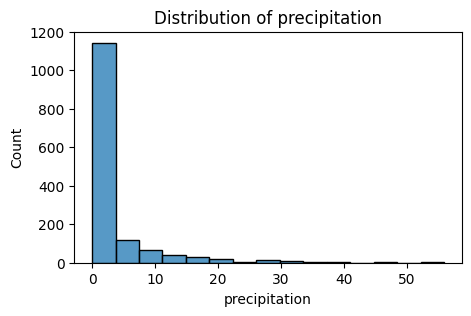

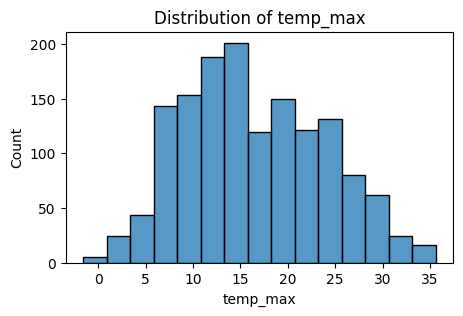

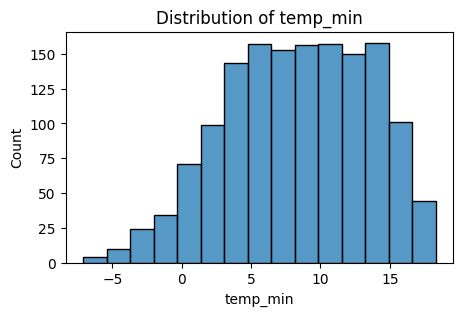

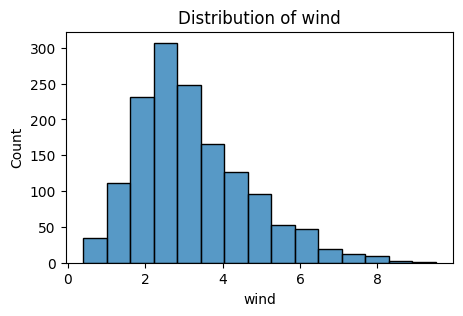

In [84]:
for column in num_col :
    plt.figure(figsize=(5, 3))
    sns.histplot(df_encoded[column], bins = 15)
    plt.title(f"Distribution of {column}")
    plt.show()

### Univariate Analysis

Displayed a BoxPlot to know the spread of data and outliers in the each column

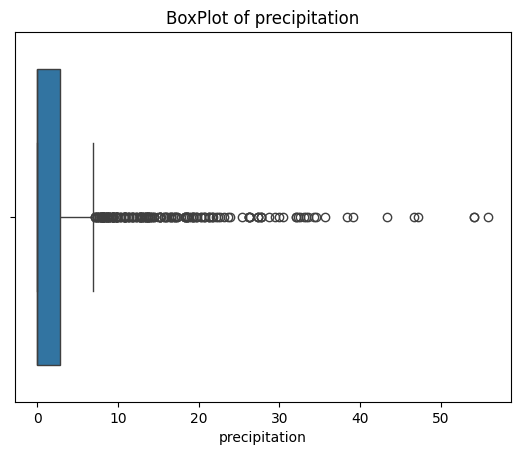

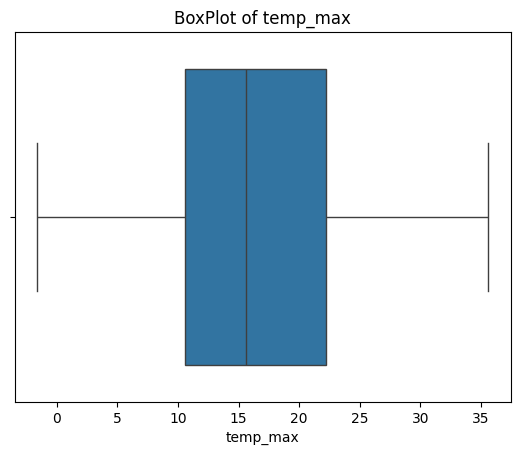

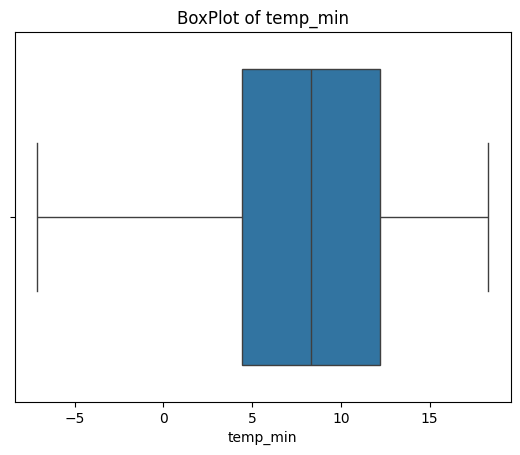

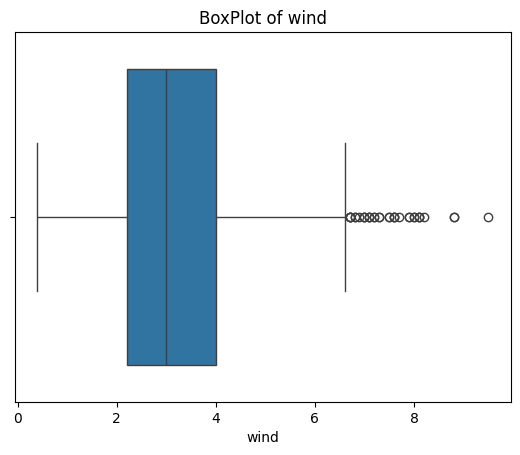

In [85]:
for column in num_col :
    sns.boxplot(x = df_encoded[column])
    plt.title(f"BoxPlot of {column}")
    plt.show()

### Treatment of Outliers

As we can see there are too many outliers in column of "precipitation"...
This can affect the model training

There is one method in Numpy where we can compress the data and make it less skews (It will be less spread over)

In [102]:
df["log_precipitation"] = np.log1p(df["precipitation"])

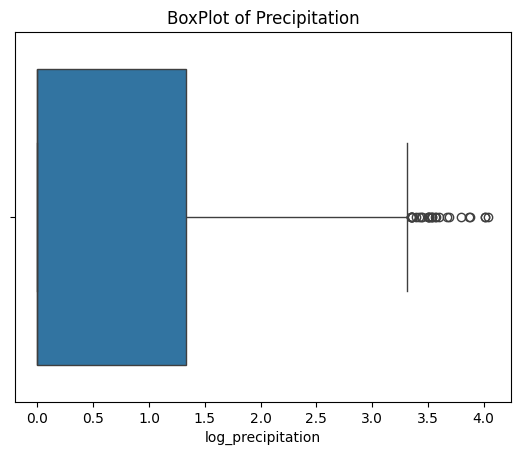

In [103]:
sns.boxplot(x = df["log_precipitation"])
plt.title("BoxPlot of Precipitation")
plt.show()

Made a separtae dataframe for categorical values

In [91]:
cat_column = ["weather_drizzle", "weather_fog",	"weather_rain",	"weather_snow",	"weather_sun"]

### Univariate Analysis

Displayed a countplot of occurences of weather (True or False)

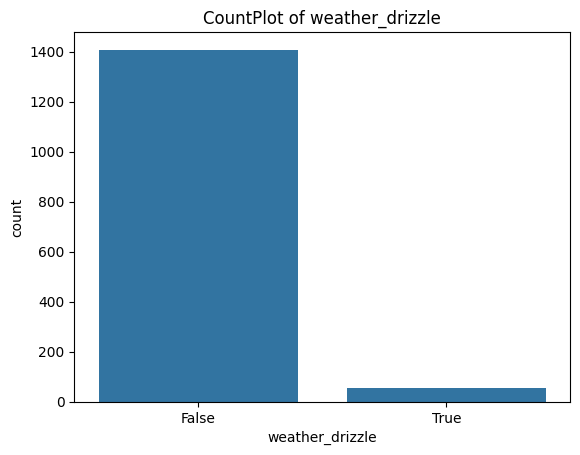

In [92]:
sns.countplot(x = "weather_drizzle", data = df_encoded)
plt.title(f"CountPlot of weather_drizzle")
plt.show()

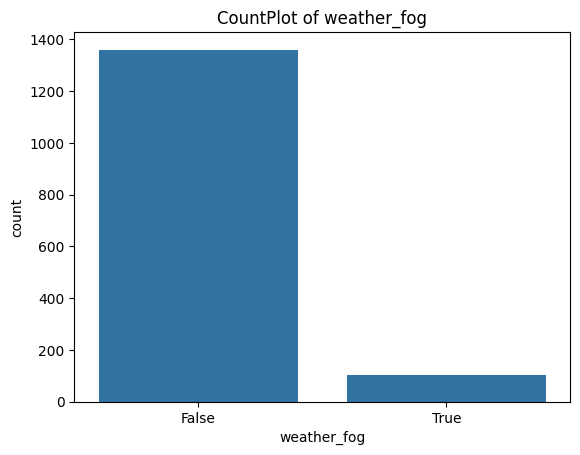

In [93]:
sns.countplot(x = "weather_fog", data = df_encoded)
plt.title(f"CountPlot of weather_fog")
plt.show()

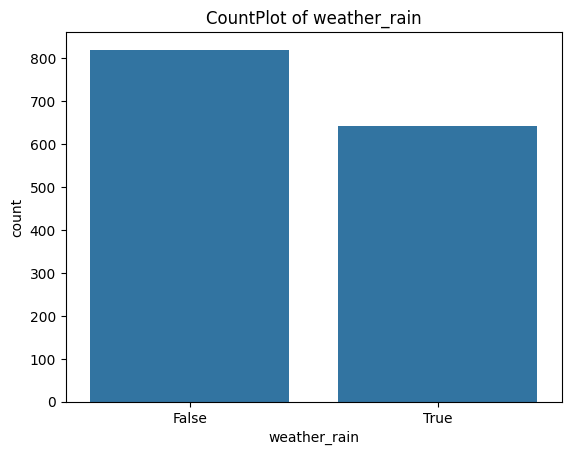

In [94]:
sns.countplot(x = "weather_rain", data = df_encoded)
plt.title(f"CountPlot of weather_rain")
plt.show()

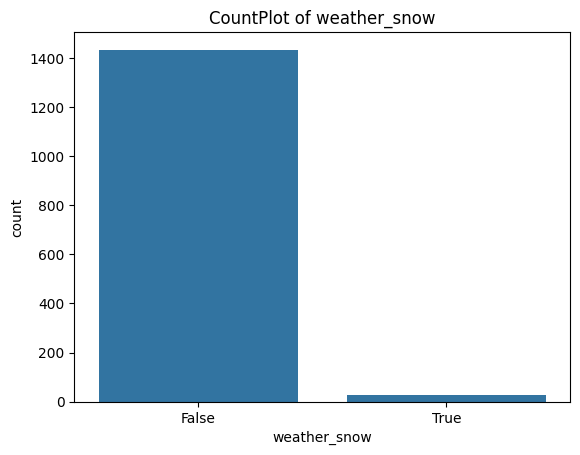

In [95]:
sns.countplot(x = "weather_snow", data = df_encoded)
plt.title(f"CountPlot of weather_snow")
plt.show()

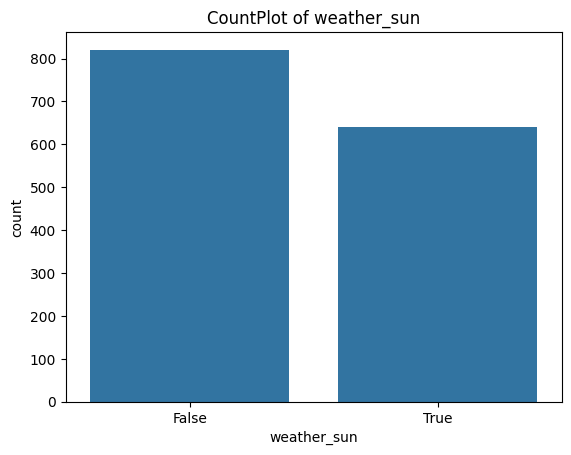

In [96]:
sns.countplot(x = "weather_sun", data = df_encoded)
plt.title(f"CountPlot of weather_sun")
plt.show()

### Bivariate Analysis

Displayed a HeatMap where it shows the relation-ship between 2 attributes

Red Color shows Positive relation and Blue Color shows Negative relation

Positive Relation Means when one variable grows (increases) other one also increases & 
Negative Relation means when one variavle grows (increase) other one decreases
 

Dark Shades show Strong relation and Faint Shades show Weak Relation


Therefore Maximum Temp and Min. Temp show Strong Positive Relation &
Precipitation and Max temp show Weak Negative Relation

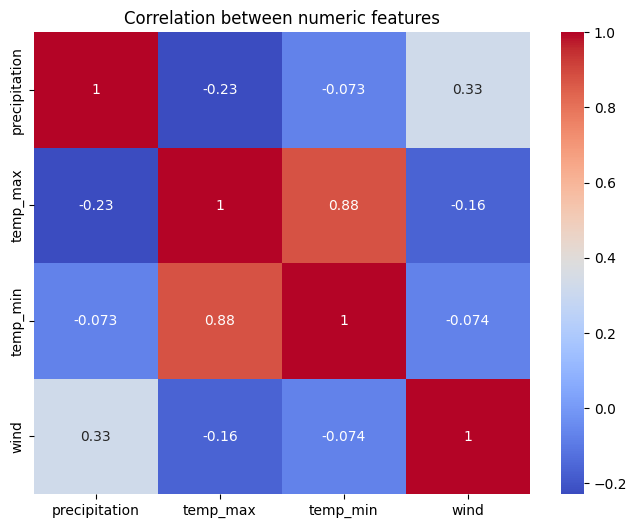

In [97]:
plt.figure(figsize=(8,6))
sns.heatmap(df_encoded[num_col].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between numeric features")
plt.show()

### Bivariate Analysis

Displayed boxplot of weather (Rain) against each numerical attribute

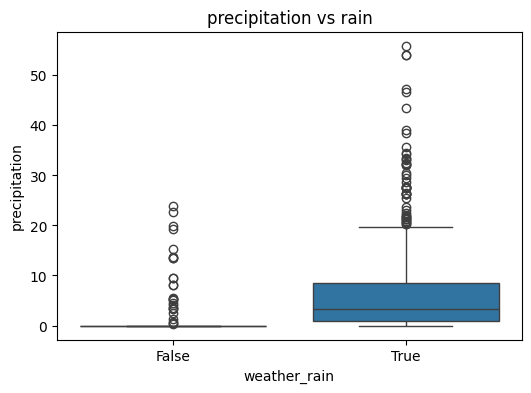

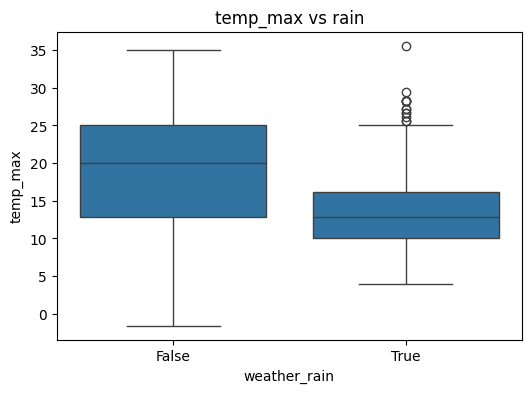

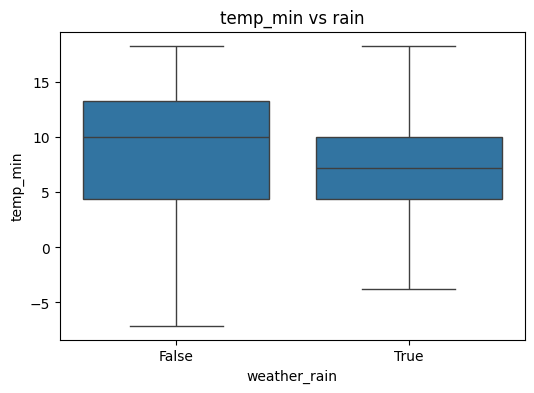

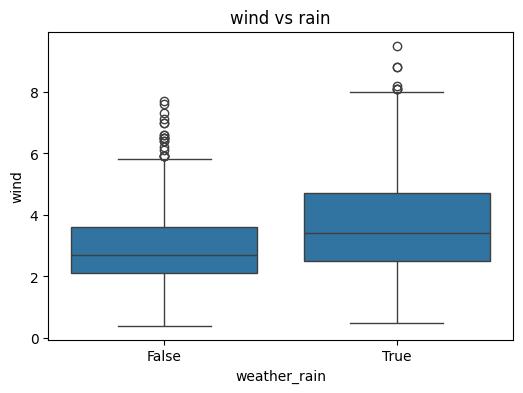

In [98]:
for column in num_col :
    plt.figure(figsize = (6,4))
    sns.boxplot(x = "weather_rain" ,y = column, data = df_encoded)
    plt.title(f"{column} vs rain")
    plt.show()

In [99]:
weather_count = df_encoded[cat_column].sum()

### Bivariate Analysis

Displayed a PairPlot of each numerical attribut against every other numerical attribute

<function matplotlib.pyplot.show(close=None, block=None)>

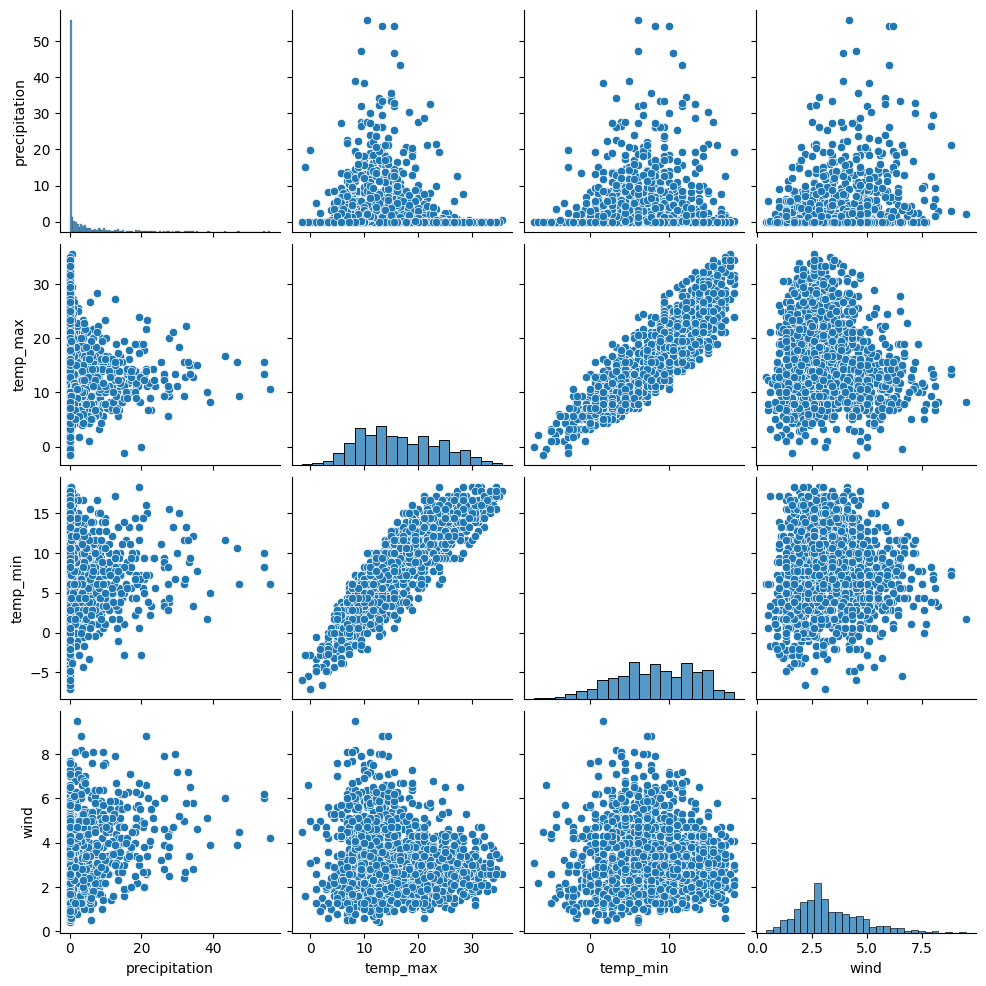

In [101]:
sns.pairplot(df_encoded[num_col])
plt.show

### Multi-Variate Analysis

Displayed CountPlot of weather conditions side-by-side

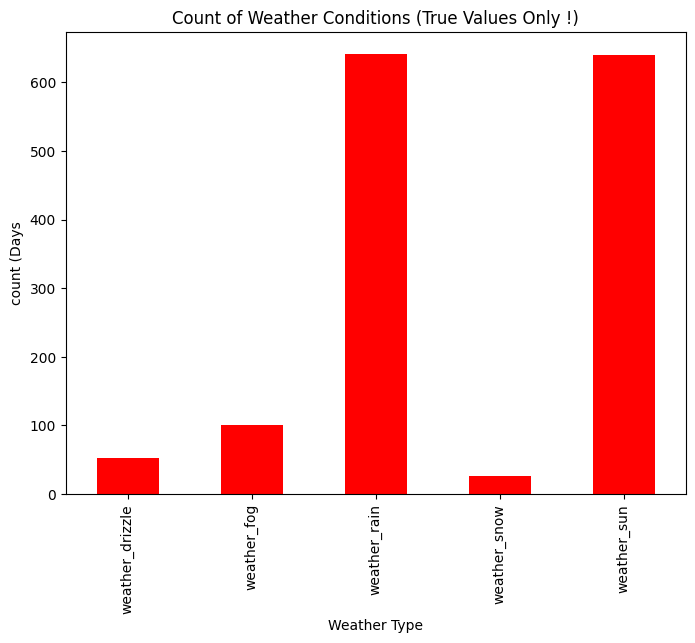

In [100]:
plt.figure(figsize = (8, 6))
weather_count.plot(kind = "bar", color = "red")
plt.title("Count of Weather Conditions (True Values Only !)")
plt.xlabel("Weather Type")
plt.ylabel("count (Days")
plt.xticks(rotation = 90)
plt.show()